# Simple Linear Regression 

A regressão linear é um método estatístico utilizado para modelar a relação entre uma variável dependente (ou variável alvo) e uma ou mais variáveis independentes (ou variáveis preditoras).

A variável que você deseja prever é chamada de variável dependente, e a variável que você está utilizando para prever o valor da outra variável é chamada de variável independente.

O objetivo é encontrar uma linha reta que melhor ajuste os dados, minimizando a distância entre os pontos de dados e a linha, ou seja, regressão linear assume que o relacionamento entre duas variáveis, x e y, pode ser modelado por uma linha reta dada pela equação a seguir:

*y=β0+β1x*

- Link do dataset: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

### Load the libraries and data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

data = pd.read_csv("dataset/Salary_dataset.csv")
sns.set()

### Simple data view and info

In [16]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [18]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


### Data Exploration

In [28]:
# Dependent variable
y = data["Salary"]
# Independent variable
x1 = data["YearsExperience"]

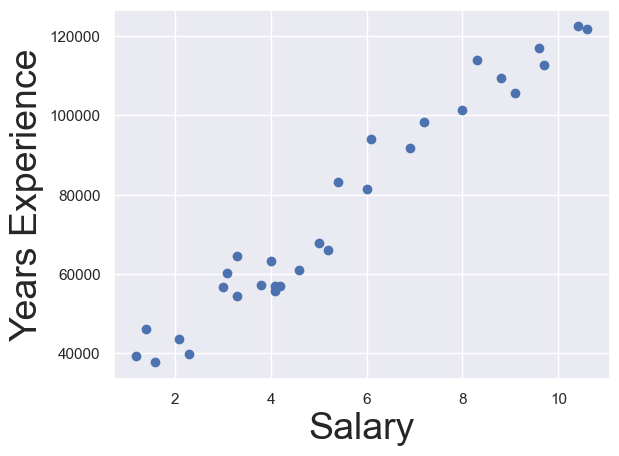

In [33]:
# First we put the horizontal axis, then the vertical axis
plt.scatter(x1, y)
# Plotting and naming the axes
plt.xlabel("Salary", fontsize=27)
plt.ylabel("Years Experience", fontsize=27)
plt.show()

### Regression

In [34]:
# Add a constant
x = sm.add_constant(x1)
# using OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.14e-20
Time:                        15:01:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the regression line 

In [ ]:
plt.scatter(x1, y)
yhat = 9449.9623 * x1 + 2.48500
fig = plt.plot(x1,yhat, lw=4, c='red', label ='regression line')
plt.xlabel("Salary", fontsize=27)
plt.ylabel("Years Experience", fontsize=27)
plt.show()